# Ivan's E-Commerce Exploratory NoteBook

#####
Data Importing and Pre-processing
- Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used
- Clean, wrangle, and handle missing data
- Transform data appropriately using techniques such as aggregation, normalization, and feature construction
- Reduce redundant data and perform need based discretization

Data Analysis and Visualization
- Identify categorical, ordinal, and numerical variables within data
- Provide measures of centrality and distribution with visualizations
- Diagnose for correlations between variables and determine independent and dependent variables
- Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest

Data Analytics
- Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables
- Train, test, and provide accuracy and evaluation metrics for model results

Presentation
- In a 5 to 10 minutes video, briefly explain the project workflow from the code and results in your markdown notebook
State your findings from the data and provide the interpretation of results from your analysis at each stage in the project

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing CSV Dataset from E-Commerce

In [2]:
#Set File Path & import csv
datasetFP = '../data/Dataset 3 (Online Shoppers Intention)/online_shoppers_intention.csv'
eCommerceDF = pd.read_csv(datasetFP) 

#### Getting number of rows and columns

In [3]:
eCommerceDF.shape

(12330, 18)

#### Found when Informational page = 0 Informational Duration = 0

In [4]:
eCommerceDF.groupby(['Informational'])['Informational_Duration'].mean()

Informational
0.0        0.000000
1.0       72.384123
2.0      139.785144
3.0      191.345717
4.0      254.306293
5.0      396.399345
6.0      422.321253
7.0      390.512416
8.0      503.889031
9.0      705.293704
10.0     602.566667
11.0    1258.833333
12.0     651.145476
13.0    1949.166667
14.0     893.783334
16.0    1210.397619
24.0    2050.433333
Name: Informational_Duration, dtype: float64

In [5]:
eCommerceDF.loc[eCommerceDF['Informational'].isnull()&eCommerceDF['Informational_Duration'].notnull()&eCommerceDF['Informational_Duration'].eq(0),'Informational'] = 0

#### Filling missing PageValue based on mean of Revenue when False

In [6]:
revenueGroupBy = round(eCommerceDF.groupby(['Revenue'])['PageValues'].mean(),2)
revenueGroupBy

Revenue
False     1.99
True     27.35
Name: PageValues, dtype: float64

In [7]:
eCommerceDF.loc[eCommerceDF['PageValues'].isnull()&eCommerceDF['Revenue'].notnull()&eCommerceDF['Revenue'].eq(False),'PageValues'] = revenueGroupBy[0]

#### Could not find a good way to fill for Operating Systems -> opted to drop remaining values ~1% dropped 

In [8]:
eCommerceDF.shape[0]

12330

In [9]:
eCommerceDF = eCommerceDF.dropna()

In [10]:
eCommerceDF.shape[0]

12164

In [11]:
eCommerceDF.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [12]:
eCommerceDF['Informational'] = eCommerceDF['Informational'].astype('int64')

In [23]:
eCommerceDF.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

#### Log Normalized Data

<AxesSubplot:xlabel='Revenue', ylabel='ProductRelated'>

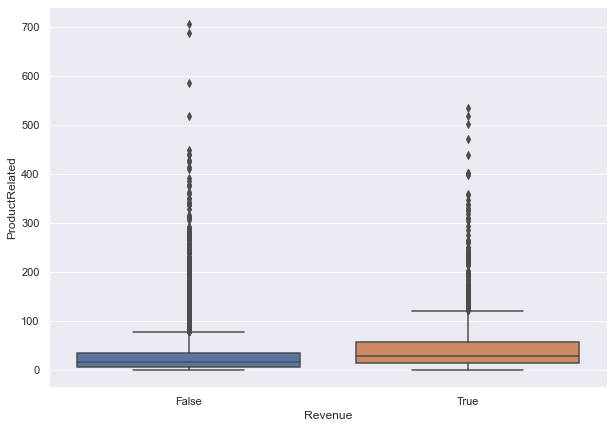

In [24]:
sns.set(rc={'figure.figsize':(10,7)})
sns.boxplot(x="Revenue", y="ProductRelated", data=eCommerceDF.dropna())

In [32]:
eCommerceDF['webpageSum'] = eCommerceDF['Administrative'] + eCommerceDF['Informational'] + eCommerceDF['ProductRelated']
eCommerceDF['webpageDuration'] = eCommerceDF['Administrative_Duration'] + eCommerceDF['Informational_Duration'] + eCommerceDF['ProductRelated_Duration']

<AxesSubplot:xlabel='Revenue', ylabel='webpageSum'>

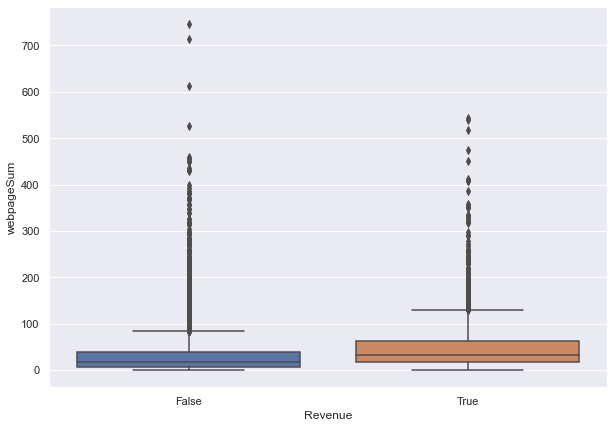

In [43]:
sns.set(rc={'figure.figsize':(10,7)})
sns.boxplot(x="Revenue", y="webpageSum", data=eCommerceDF.dropna())

In [47]:
eCommerceDF['webpageSum'].describe()
#eCommerceDF['webpageSum'].median()

count    12164.000000
mean        34.363943
std         46.189914
min          0.000000
25%          8.000000
50%         20.000000
75%         41.000000
max        746.000000
Name: webpageSum, dtype: float64

IQR = 20 || IQR*1.5 = 30 || 41+30 = 71

In [55]:
outlierWebpageDf = eCommerceDF[eCommerceDF['webpageSum'].lt(71)] 


<AxesSubplot:xlabel='Revenue', ylabel='webpageSum'>

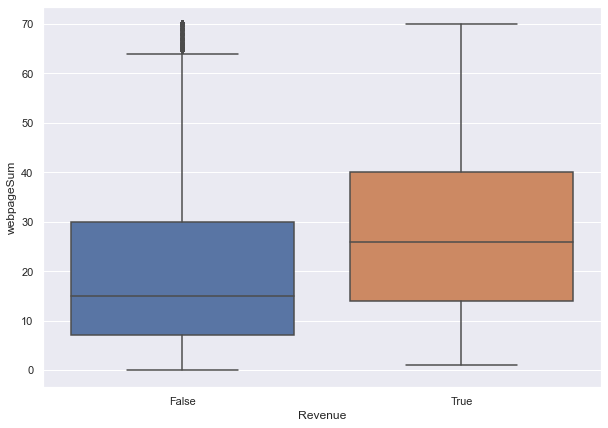

In [56]:
sns.set(rc={'figure.figsize':(10,7)})
sns.boxplot(x="Revenue", y="webpageSum", data=outlierWebpageDf.dropna())

In [57]:
outlierWebpageDf.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,webpageSum,webpageDuration
Administrative,1.000000,0.591785,0.284119,0.187872,0.312191,0.228314,-0.227801,-0.318032,0.096561,-0.105555,-0.022492,-0.018928,0.005185,-0.037105,0.032307,0.114789,0.461404,0.331076
Administrative_Duration,0.591785,1.000000,0.222217,0.142554,0.194615,0.219338,-0.145107,-0.205503,0.069826,-0.073860,-0.013602,-0.006223,0.010535,-0.016027,0.023614,0.084284,0.285262,0.385178
Informational,0.284119,0.222217,1.000000,0.593941,0.201296,0.194603,-0.105575,-0.144962,0.042104,-0.035531,-0.011359,-0.035425,-0.014291,-0.034545,0.032162,0.066878,0.287691,0.286768
Informational_Duration,0.187872,0.142554,0.593941,1.000000,0.127273,0.159431,-0.064322,-0.089146,0.036647,-0.020762,-0.012110,-0.014227,-0.007439,-0.028798,0.020154,0.051524,0.180999,0.289227
ProductRelated,0.312191,0.194615,0.201296,0.127273,1.000000,0.716420,-0.327994,-0.449776,0.131976,0.005924,-0.003407,-0.000545,-0.008624,-0.054556,0.037723,0.152105,0.985315,0.708197
ProductRelated_Duration,0.228314,0.219338,0.194603,0.159431,0.716420,1.000000,-0.261412,-0.341802,0.127014,-0.020431,0.006325,0.011895,0.009927,-0.040128,0.012455,0.141817,0.709503,0.977680
BounceRates,-0.227801,-0.145107,-0.105575,-0.064322,-0.327994,-0.261412,1.000000,0.913608,-0.121348,0.073033,0.023287,-0.017886,-0.010163,0.075434,-0.049464,-0.149586,-0.345050,-0.272828
ExitRates,-0.318032,-0.205503,-0.144962,-0.089146,-0.449776,-0.341802,0.913608,1.000000,-0.177073,0.103169,0.015484,-0.007328,-0.015473,0.075202,-0.067221,-0.204374,-0.474059,-0.359944
PageValues,0.096561,0.069826,0.042104,0.036647,0.131976,0.127014,-0.121348,-0.177073,1.000000,-0.066807,0.019192,0.047025,0.015435,0.012221,0.010595,0.541854,0.139584,0.133088
SpecialDay,-0.105555,-0.073860,-0.035531,-0.020762,0.005924,-0.020431,0.073033,0.103169,-0.066807,1.000000,0.009316,-0.002040,-0.020002,0.043891,-0.020066,-0.074601,-0.013058,-0.033564


<AxesSubplot:xlabel='Revenue', ylabel='webpageDuration'>

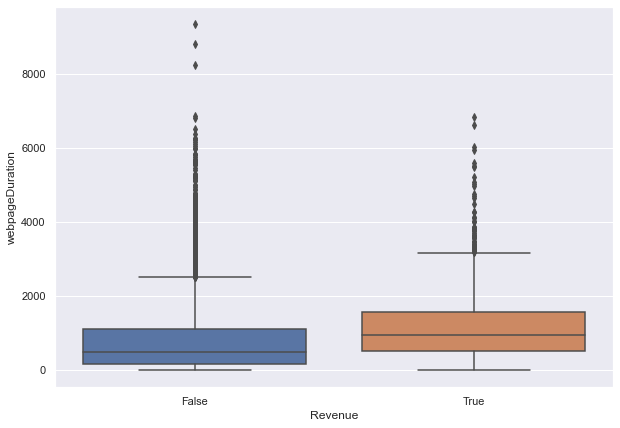

In [59]:
sns.set(rc={'figure.figsize':(10,7)})
sns.boxplot(x="Revenue", y="webpageDuration", data=outlierWebpageDf.dropna())

In [61]:
outlierWebpageDf['webpageDuration'].describe()

count    10704.000000
mean       836.989021
std        916.231482
min          0.000000
25%        182.000000
50%        548.670238
75%       1189.013393
max       9339.783883
Name: webpageDuration, dtype: float64

IQR = 659.67 || IQR*1.5 = 989.51 || cutoff = 2,178.52

In [62]:
outlierWebpageDf = outlierWebpageDf[outlierWebpageDf['webpageDuration'].lt(2178.52)] 

<AxesSubplot:xlabel='Revenue', ylabel='webpageDuration'>

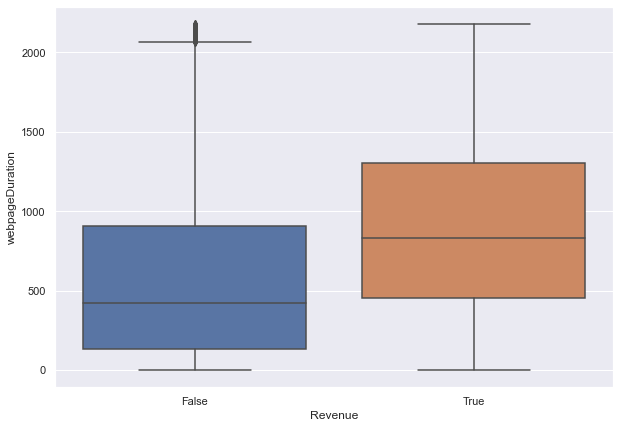

In [63]:
sns.set(rc={'figure.figsize':(10,7)})
sns.boxplot(x="Revenue", y="webpageDuration", data=outlierWebpageDf.dropna())

In [64]:
outlierWebpageDf.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,webpageSum,webpageDuration
Administrative,1.000000,0.656060,0.253735,0.165316,0.300037,0.229126,-0.232022,-0.323019,0.084124,-0.107286,-0.017811,-0.014022,0.006574,-0.035354,0.037258,0.110944,0.455633,0.358850
Administrative_Duration,0.656060,1.000000,0.194581,0.124983,0.175685,0.174750,-0.169509,-0.240475,0.076136,-0.088786,0.001744,-0.001214,0.022842,-0.013606,0.035311,0.099361,0.280926,0.370068
Informational,0.253735,0.194581,1.000000,0.659208,0.171294,0.160941,-0.102771,-0.142231,0.030275,-0.044996,-0.000969,-0.031245,-0.013153,-0.027374,0.036769,0.056462,0.256435,0.265943
Informational_Duration,0.165316,0.124983,0.659208,1.000000,0.103276,0.097972,-0.070359,-0.100435,0.033877,-0.029216,-0.004615,-0.018736,-0.008507,-0.024701,0.020958,0.052200,0.159801,0.235153
ProductRelated,0.300037,0.175685,0.171294,0.103276,1.000000,0.739370,-0.333194,-0.457107,0.130406,0.003723,-0.004700,-0.001040,-0.013635,-0.055165,0.047128,0.153664,0.984284,0.731244
ProductRelated_Duration,0.229126,0.174750,0.160941,0.097972,0.739370,1.000000,-0.324461,-0.424626,0.159702,-0.031721,0.005389,0.004757,0.002866,-0.046519,0.034287,0.180464,0.730876,0.971850
BounceRates,-0.232022,-0.169509,-0.102771,-0.070359,-0.333194,-0.324461,1.000000,0.914476,-0.119705,0.072389,0.024183,-0.017775,-0.008965,0.075401,-0.052511,-0.150673,-0.352142,-0.341757
ExitRates,-0.323019,-0.240475,-0.142231,-0.100435,-0.457107,-0.424626,0.914476,1.000000,-0.173578,0.102181,0.016104,-0.007036,-0.014601,0.075557,-0.071280,-0.204798,-0.483942,-0.451866
PageValues,0.084124,0.076136,0.030275,0.033877,0.130406,0.159702,-0.119705,-0.173578,1.000000,-0.063183,0.017573,0.047686,0.010725,0.010512,0.011441,0.555250,0.136167,0.166715
SpecialDay,-0.107286,-0.088786,-0.044996,-0.029216,0.003723,-0.031721,0.072389,0.102181,-0.063183,1.000000,0.010040,-0.002542,-0.025577,0.041755,-0.021545,-0.073844,-0.016647,-0.050047


<AxesSubplot:>

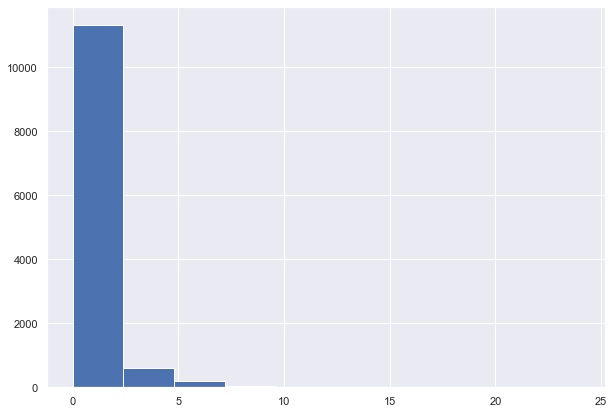

In [14]:
eCommerceDF['Informational'].hist()

In [22]:
eCommerceDF.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12164.000000,12164.000000,12164.000000,12164.000000,12164.000000,12164.000000,12164.000000,12164.000000,12164.000000,12164.000000,12164.000000,12164.000000,12164.000000,12164.000000
mean,2.300477,80.490085,0.496712,34.120285,31.566754,1187.128809,0.022307,0.043226,5.877560,0.061526,2.124137,2.355804,3.146087,4.072345
std,3.307412,175.728444,1.262701,140.584857,44.169076,1898.950909,0.048628,0.048720,18.595333,0.198993,0.912273,1.718830,2.399769,4.031533
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,183.333333,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.000000,0.000000,0.000000,18.000000,597.600000,0.003125,0.025307,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,92.770833,0.000000,0.000000,38.000000,1458.980407,0.016981,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [15]:
#eCommerceDF['Informational_log'] = np.log2(eCommerceDF['Informational'])

In [16]:
#eCommerceDF.corr()['Revenue']


In [17]:
#eCommerceDF.corr()
#subset = eCommerceDF[(eCommerceDF != 0)]
#subset.isna().sum()
#subset['logarithm_base2'] = np.log2(subset['ProductRelated'])
#subset['logarithm_base2'].hist()

In [18]:
eCommerceDF.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [20]:
subsetCommerce = eCommerceDF.drop(columns=['OperatingSystems','Browser','Region','TrafficType','BounceRates','ExitRates'])

In [21]:
subsetCommerce

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,SpecialDay,Month,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.000000,0.0,Feb,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.0,Feb,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.000000,0.0,Feb,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.000000,0.0,Feb,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.000000,0.0,Feb,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,12.241717,0.0,Dec,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.0,Nov,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.000000,0.0,Nov,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.0,Nov,Returning_Visitor,False,False
